In [1]:
#! pip install seaborn
#! pip install matplotlib
#! pip install pandas
#! pip install numpy
#! pip install scikit-learn

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [59]:
df = pd.read_csv('Thyroid_Diff.csv')

In [60]:
df.head()

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [61]:
df['Physical Examination'].value_counts()

Physical Examination
Multinodular goiter            140
Single nodular goiter-right    140
Single nodular goiter-left      89
Normal                           7
Diffuse goiter                   7
Name: count, dtype: int64

age: getal

Gender: M or F --> man of vrouw

Smoking: rookt ja of nee

Hx smoking: heeft een geschiedenis/verleden van Roken

Hx Radiothreapy: spelfout; heeft in het verleden Radiotherapie gekregen

Thyroid Function: Euthyroid is normaal, Clinical Hyperthyroidism is niet normaal

Physical Examination: details over het medisch onderzoek (wat voor soort knobbel hebben ze)

Adenopathy: zijn er vergrote klieren; ja of nee

Pathologie: de soort

Focality: op 1 of meerdere plaatsen

Risk: risico (laag, gemiddeld, hoog)

T: tumor parameter

N: Node parameter

M: metastase parameter

Stage: hoever staat de kanker

Response: wat is de invloed van de behandeling

Recurred: is de kanker teruggekomen?

In [4]:
df.describe()

,Age
count,383.000000
mean,40.866841
std,15.134494
min,15.000000
25%,29.000000
50%,37.000000
75%,51.000000
max,82.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Age                   383 non-null    int64 
 1   Gender                383 non-null    object
 2   Smoking               383 non-null    object
 3   Hx Smoking            383 non-null    object
 4   Hx Radiothreapy       383 non-null    object
 5   Thyroid Function      383 non-null    object
 6   Physical Examination  383 non-null    object
 7   Adenopathy            383 non-null    object
 8   Pathology             383 non-null    object
 9   Focality              383 non-null    object
 10  Risk                  383 non-null    object
 11  T                     383 non-null    object
 12  N                     383 non-null    object
 13  M                     383 non-null    object
 14  Stage                 383 non-null    object
 15  Response              383 non-null    ob

In [7]:
df_encoded = pd.get_dummies(df)
df_encoded.head()


,Age,Gender_F,Gender_M,Smoking_No,Smoking_Yes,Hx Smoking_No,Hx Smoking_Yes,Hx Radiothreapy_No,Hx Radiothreapy_Yes,Thyroid Function_Clinical Hyperthyroidism,...,Stage_II,Stage_III,Stage_IVA,Stage_IVB,Response_Biochemical Incomplete,Response_Excellent,Response_Indeterminate,Response_Structural Incomplete,Recurred_No,Recurred_Yes
0,27,True,False,True,False,True,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,34,True,False,True,False,False,True,True,False,False,...,False,False,False,False,False,True,False,False,True,False
2,30,True,False,True,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
3,62,True,False,True,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False
4,62,True,False,True,False,True,False,True,False,False,...,False,False,False,False,False,True,False,False,True,False


In [8]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 57 columns):
 #   Column                                            Non-Null Count  Dtype
---  ------                                            --------------  -----
 0   Age                                               383 non-null    int64
 1   Gender_F                                          383 non-null    bool 
 2   Gender_M                                          383 non-null    bool 
 3   Smoking_No                                        383 non-null    bool 
 4   Smoking_Yes                                       383 non-null    bool 
 5   Hx Smoking_No                                     383 non-null    bool 
 6   Hx Smoking_Yes                                    383 non-null    bool 
 7   Hx Radiothreapy_No                                383 non-null    bool 
 8   Hx Radiothreapy_Yes                               383 non-null    bool 
 9   Thyroid Function_Clinical Hyperthyroidism  

run code twice for it to show the heatmap properly

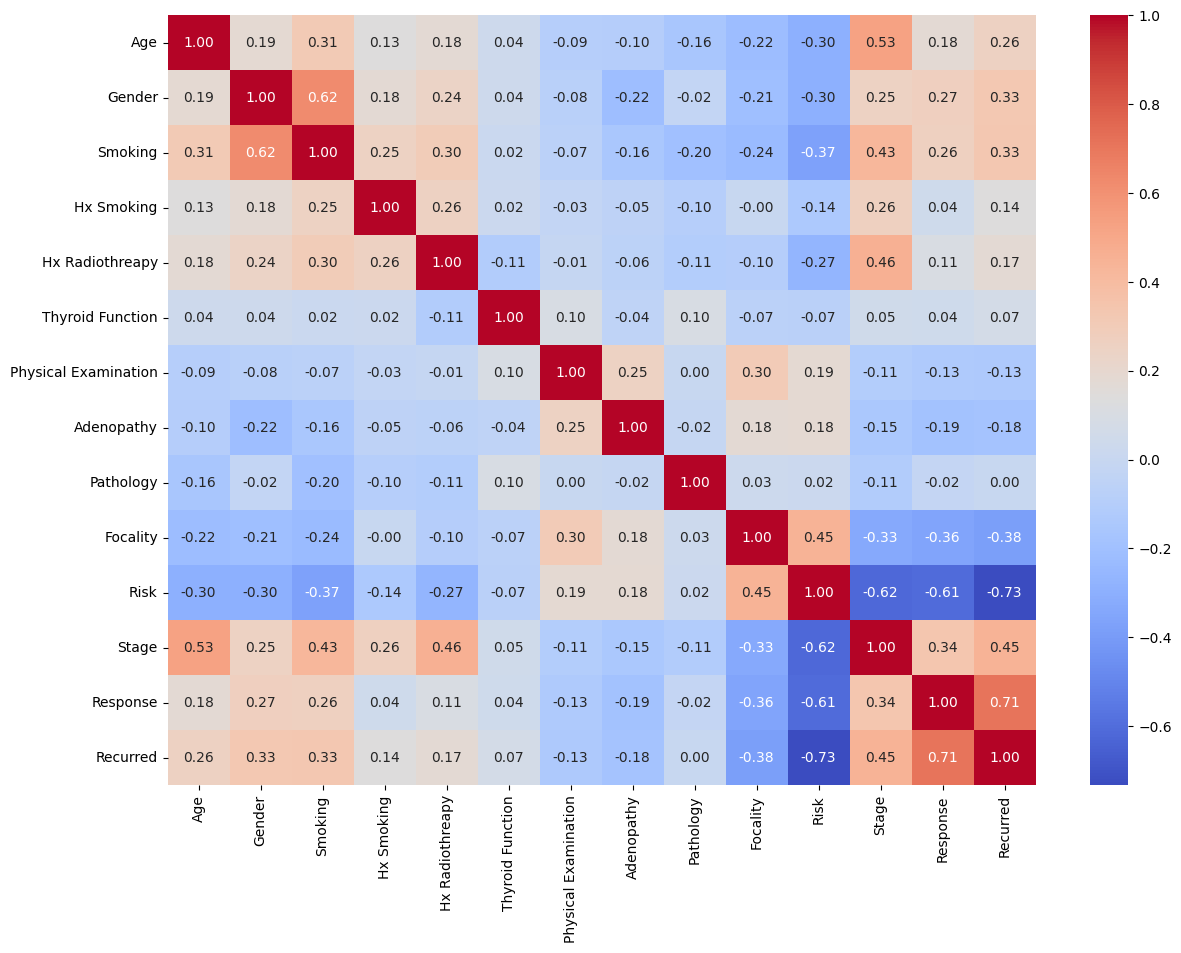

In [9]:
columns_to_encode = ['Gender', 'Smoking', 'Hx Smoking', 'Hx Radiothreapy', 'Thyroid Function', 'Physical Examination', 'Adenopathy', 'Pathology', 'Focality', 'Risk', 'Stage', 'Response', 'Recurred']

# Apply label encoding to selected columns
label_encoder = LabelEncoder()
for column in columns_to_encode:
    df[column] = label_encoder.fit_transform(df[column])

# One-hot encode remaining categorical columns
df_encoded = pd.get_dummies(df, columns=['T', 'N', 'M'])

# Select only numerical columns for correlation analysis
numerical_columns = df_encoded.select_dtypes(include=['int64', 'float64']).columns
df_numerical = df_encoded[numerical_columns]

# Compute the correlation matrix
correlation_matrix = df_numerical.corr()
# Create a heatmap
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [10]:
correlation_matrix

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response,Recurred
Age,1.000000,0.186457,0.309536,0.134531,0.176588,0.036043,-0.092546,-0.101509,-0.159689,-0.223847,-0.295556,0.526862,0.180643,0.258897
Gender,0.186457,1.000000,0.621886,0.175755,0.235865,0.037558,-0.079013,-0.215953,-0.023539,-0.207634,-0.295229,0.250215,0.272868,0.328189
Smoking,0.309536,0.621886,1.000000,0.252773,0.297874,0.017750,-0.066707,-0.155523,-0.202167,-0.238494,-0.374324,0.426152,0.263184,0.333243
Hx Smoking,0.134531,0.175755,0.252773,1.000000,0.261198,0.022111,-0.027658,-0.050382,-0.095052,-0.001204,-0.138403,0.262371,0.042867,0.136073
Hx Radiothreapy,0.176588,0.235865,0.297874,0.261198,1.000000,-0.112998,-0.013437,-0.057781,-0.106469,-0.102415,-0.272056,0.461901,0.105908,0.174407
Thyroid Function,0.036043,0.037558,0.017750,0.022111,-0.112998,1.000000,0.097316,-0.044032,0.095392,-0.067081,-0.072472,0.046218,0.044829,0.067758
Physical Examination,-0.092546,-0.079013,-0.066707,-0.027658,-0.013437,0.097316,1.000000,0.248599,0.001206,0.304883,0.187451,-0.105831,-0.129953,-0.131801
Adenopathy,-0.101509,-0.215953,-0.155523,-0.050382,-0.057781,-0.044032,0.248599,1.000000,-0.015111,0.175732,0.182049,-0.150069,-0.190686,-0.182530
Pathology,-0.159689,-0.023539,-0.202167,-0.095052,-0.106469,0.095392,0.001206,-0.015111,1.000000,0.030219,0.020351,-0.111171,-0.019872,0.003272
Focality,-0.223847,-0.207634,-0.238494,-0.001204,-0.102415,-0.067081,0.304883,0.175732,0.030219,1.000000,0.450615,-0.331892,-0.356521,-0.383776


In [11]:
df_numerical

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,Stage,Response,Recurred
0,27,0,0,0,0,2,3,3,2,1,2,0,2,0
1,34,0,0,1,0,2,1,3,2,1,2,0,1,0
2,30,0,0,0,0,2,4,3,2,1,2,0,1,0
3,62,0,0,0,0,2,4,3,2,1,2,0,1,0
4,62,0,0,0,0,2,1,3,2,0,2,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,1,1,1,1,2,4,5,3,1,0,4,0,1
379,81,1,1,0,1,2,1,1,3,0,0,4,3,1
380,72,1,1,1,0,2,1,0,3,0,0,4,3,1
381,61,1,1,1,1,0,1,1,1,0,0,3,3,1


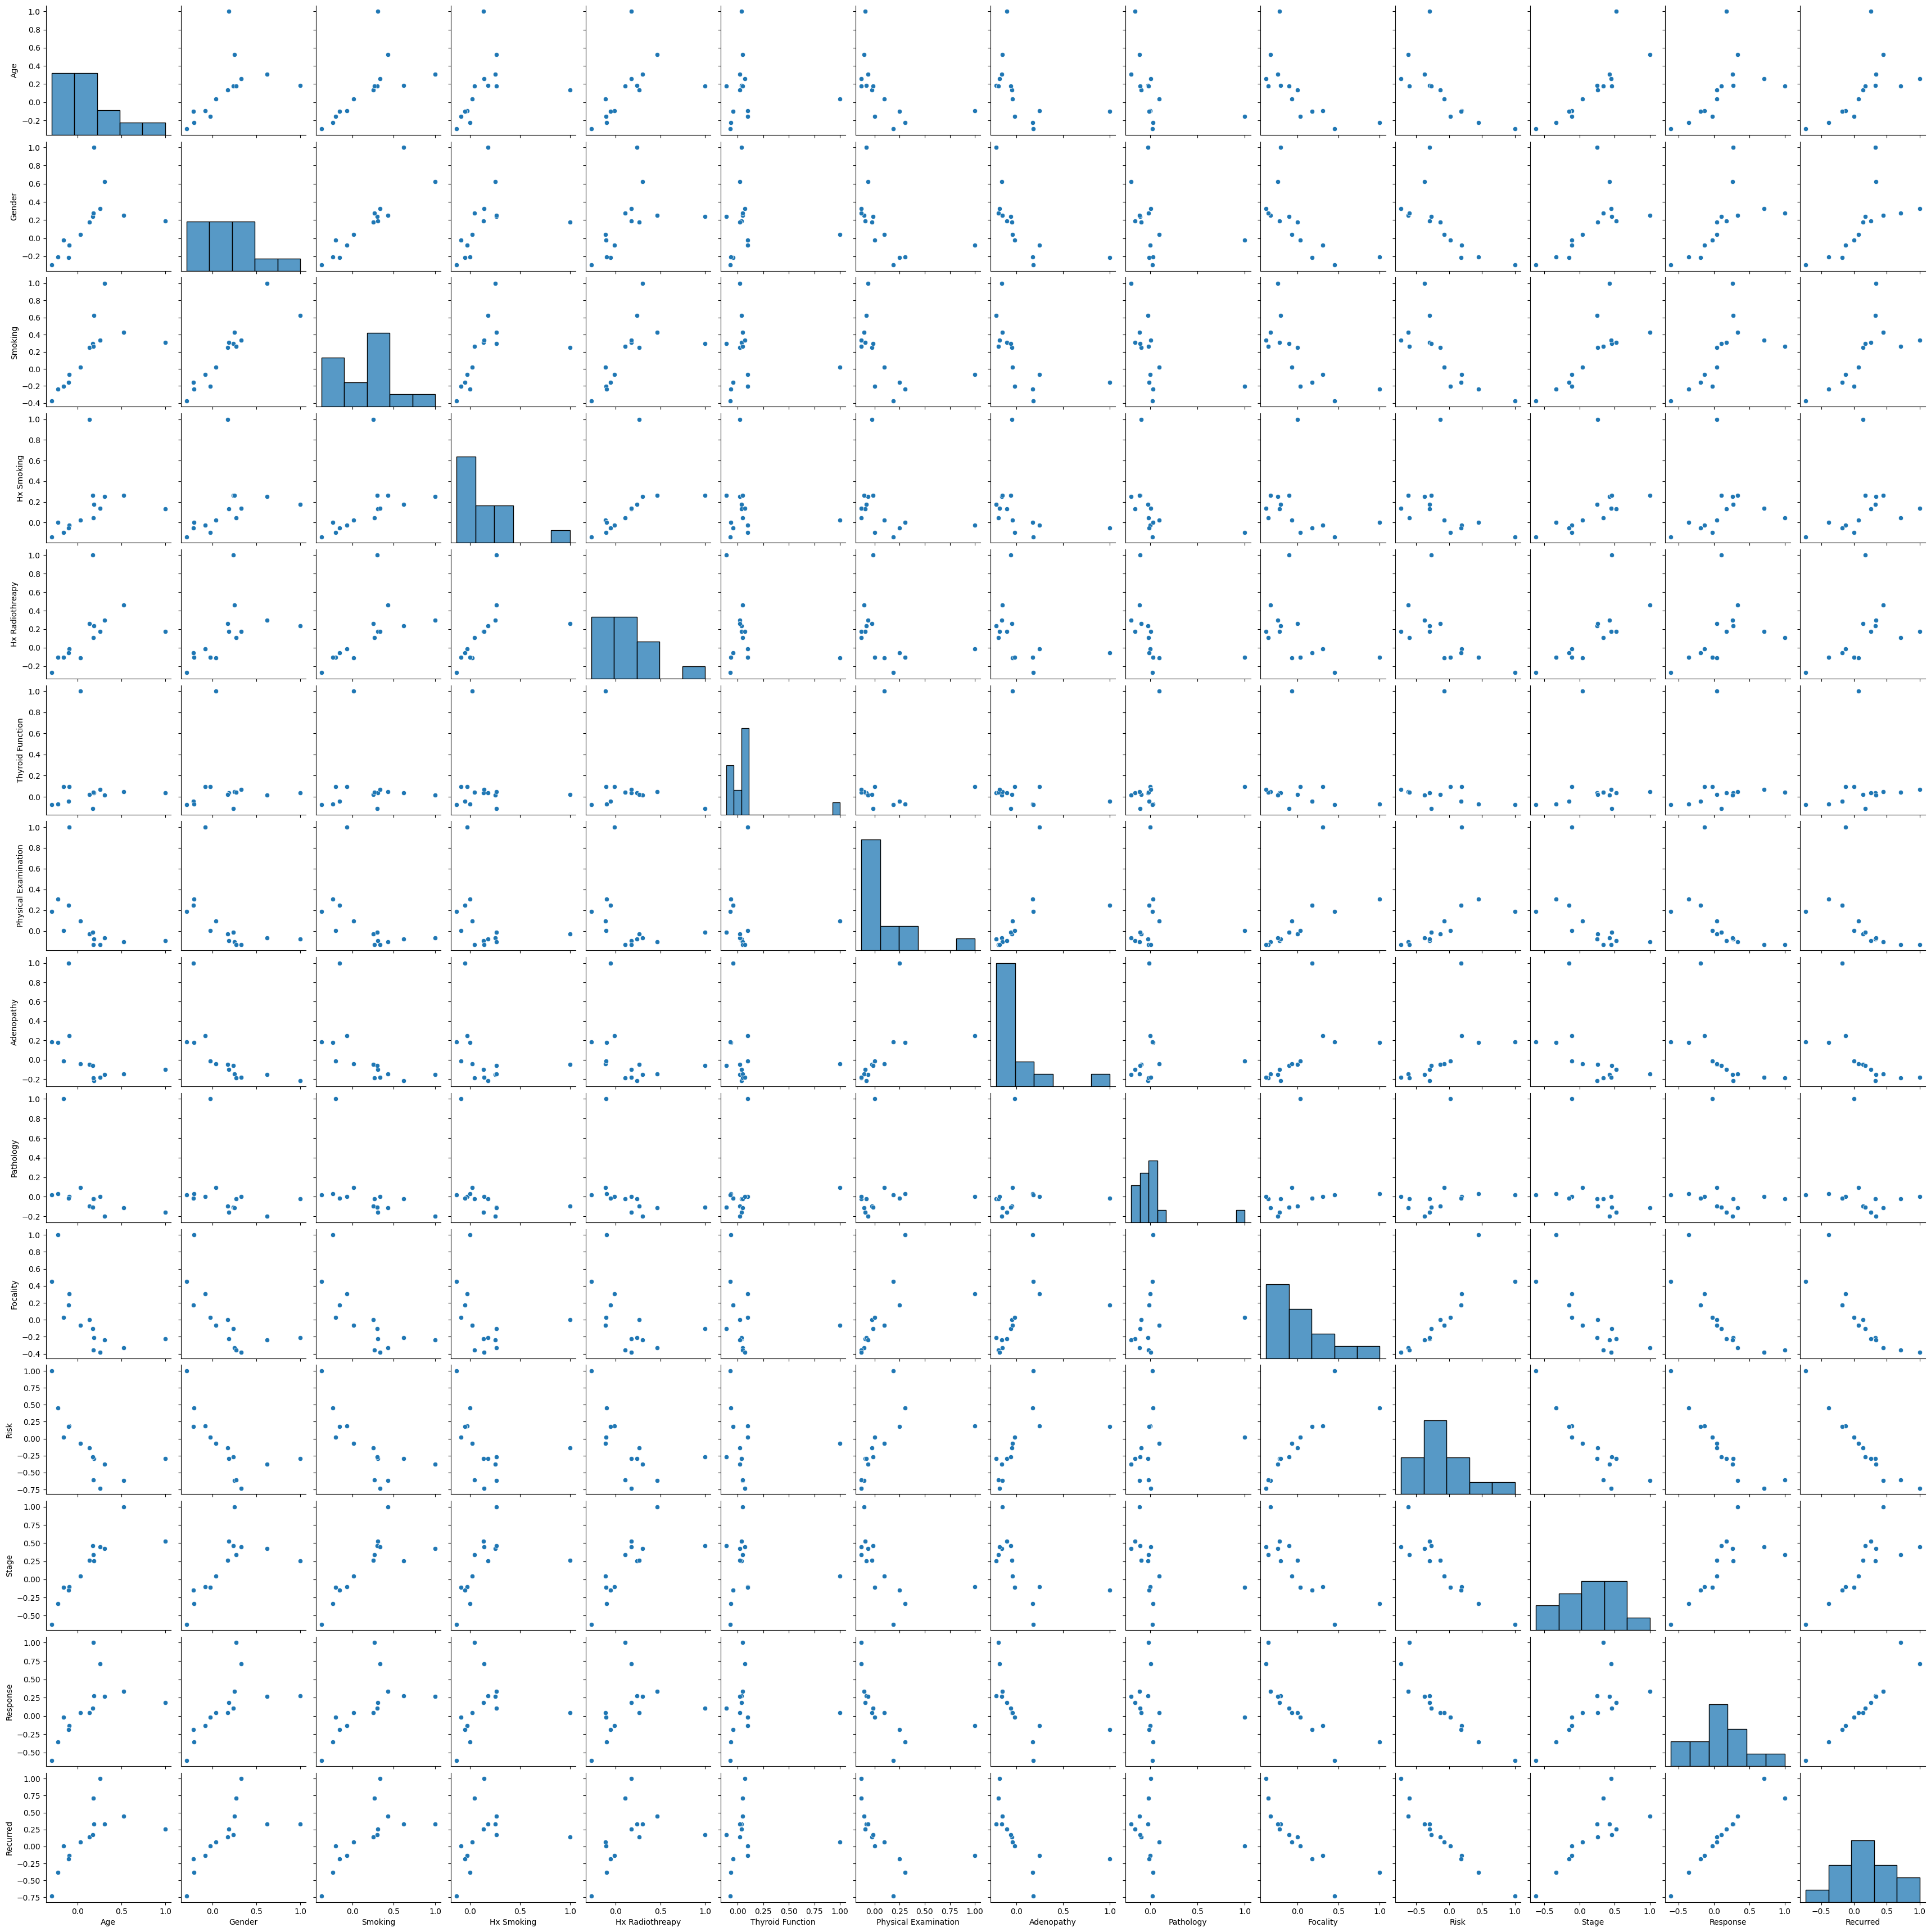

In [12]:
sns.pairplot(correlation_matrix)

<Axes: ylabel='Age'>

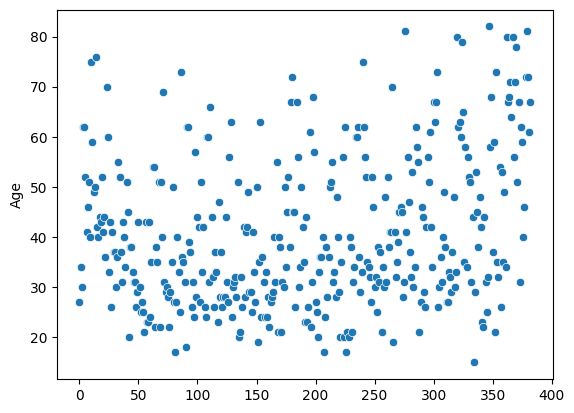

In [13]:
sns.scatterplot(df['Age'])

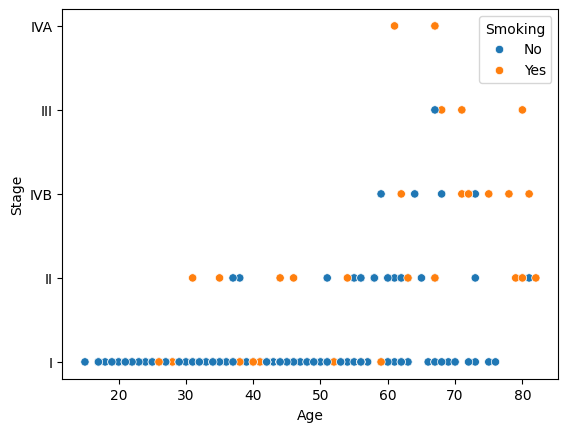

In [22]:
sns.scatterplot(x='Age', y='Stage', data=df, hue='Smoking')
plt.gca().invert_yaxis()

In [17]:
df = pd.read_csv('Thyroid_Diff.csv')

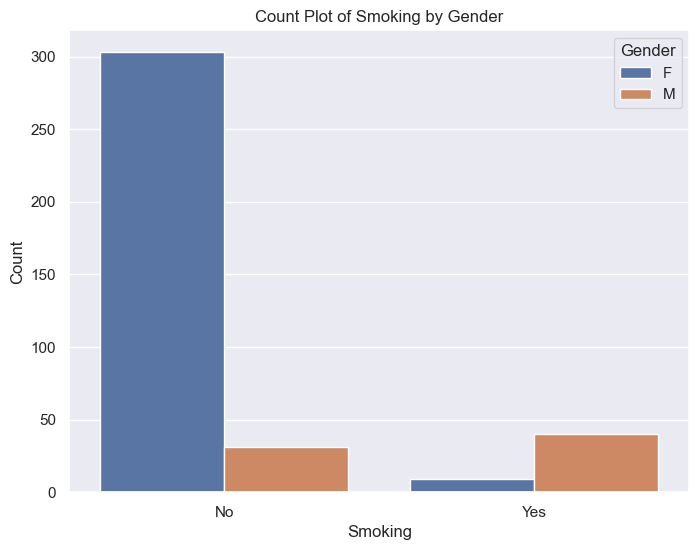

In [15]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', hue='Gender', data=df)

# Add labels and title
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Count Plot of Smoking by Gender')

# Show the plot
plt.show()

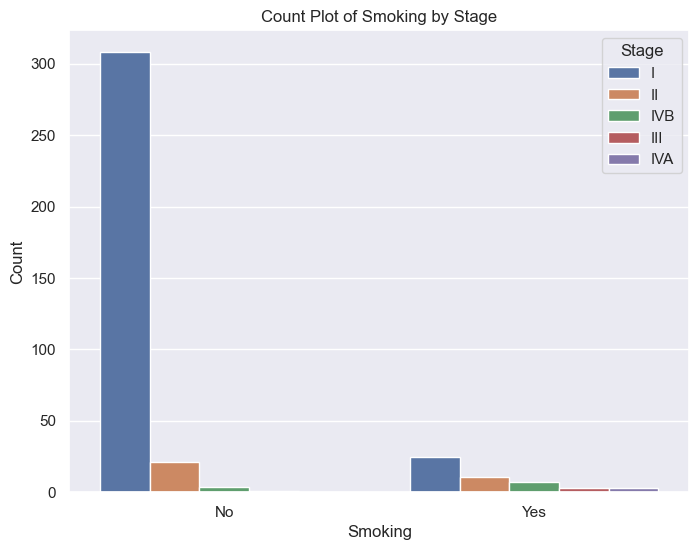

In [16]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Smoking', hue='Stage', data=df)

# Add labels and title
plt.xlabel('Smoking')
plt.ylabel('Count')
plt.title('Count Plot of Smoking by Stage')

# Show the plot
plt.show()

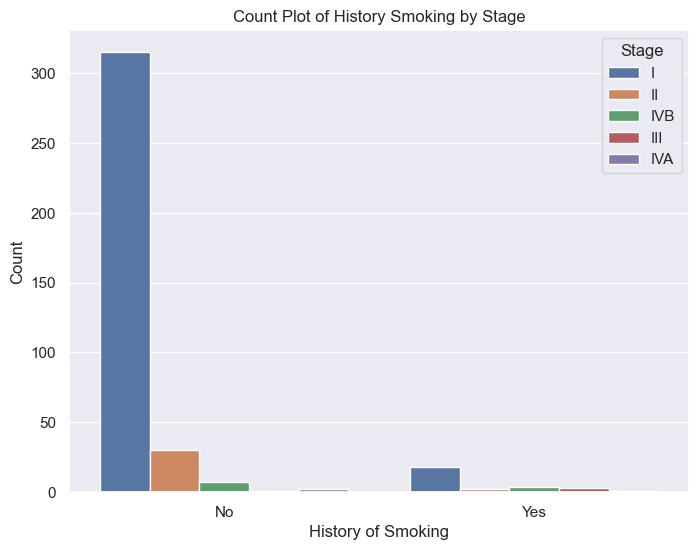

In [21]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Hx Smoking', hue='Stage', data=df)

# Add labels and title
plt.xlabel('History of Smoking')
plt.ylabel('Count')
plt.title('Count Plot of History Smoking by Stage')

# Show the plot
plt.show()

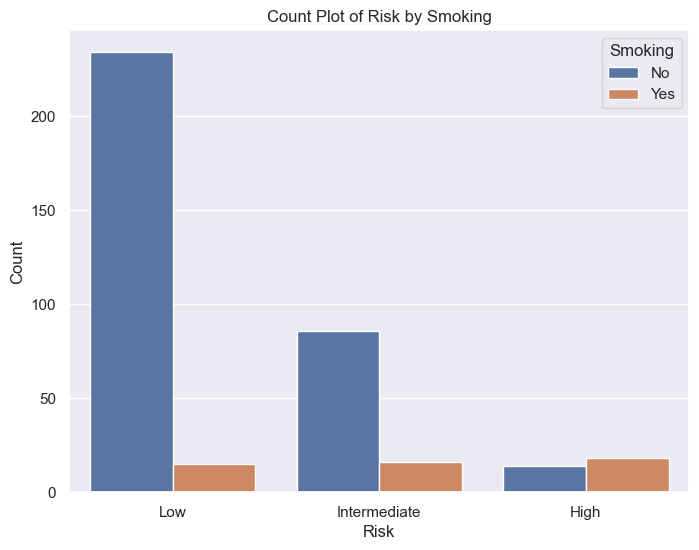

In [17]:
sns.set(style="darkgrid")
plt.figure(figsize=(8, 6))
sns.countplot(x='Risk', hue='Smoking', data=df)

# Add labels and title
plt.xlabel('Risk')
plt.ylabel('Count')
plt.title('Count Plot of Risk by Smoking')

# Show the plot
plt.show()

In [18]:
X = df.drop('Smoking', axis= 1)
Y = df['Smoking']

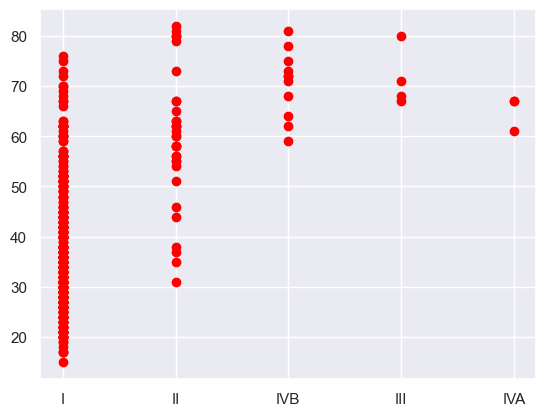

In [19]:
plt.scatter(df['Stage'],df['Age'] , color='red')

#### Classificatie en Regressie

In [70]:
df = pd.read_csv('Thyroid_Diff.csv')
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes


aanmaken variable 1 --> smoked door het combineren van mensen met een geschiedenis van roken en mensen die momenteel roken.

In [77]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Smoking'] = label_encoder.fit_transform(df['Smoking'])
df['Hx Smoking'] = label_encoder.fit_transform(df['Hx Smoking'])
df['Smoked'] = df['Smoking'] | df['Hx Smoking']
df['Smoked'].value_counts()

Smoked
0    318
1     65
Name: count, dtype: int64

aanmaken variable 2 --> radiotherapy en recurred samen om te zien waar radiotherapy niet goed gewerkt heeft.

In [78]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df['Hx Radiothreapy'] = label_encoder.fit_transform(df['Hx Radiothreapy'])
df['Recurred'] = label_encoder.fit_transform(df['Recurred'])
df['Rad&Rec'] = df['Hx Radiothreapy'] & df['Recurred']
df['Rad&Rec'].value_counts()

Rad&Rec
0    377
1      6
Name: count, dtype: int64

aanmaken variable 3 --> radiotherapie en roken. wat blijkt, dat er 6 mensen zijn die dit doen, en ook 6 mensen waarbij radiotherapie mogelijks minder goed gewerkt heeft.

In [79]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()

df['Rad&Smoke'] = df['Hx Radiothreapy'] & df['Smoking']
df['Rad&Smoke'].value_counts()

Rad&Smoke
0    377
1      6
Name: count, dtype: int64

In [81]:
df['Smoked'] = df['Smoked'].replace([0,1],['No','Yes'])
df['Smoking'] = df['Smoking'].replace([0,1],['No','Yes'])
df['Hx Smoking'] = df['Hx Smoking'].replace([0,1],['No','Yes'])

In [82]:
df['Rad&Rec'] = df['Rad&Rec'].replace([0,1],['No','Yes'])
df['Hx Radiothreapy'] = df['Hx Radiothreapy'].replace([0,1],['No','Yes'])
df['Recurred'] = df['Recurred'].replace([0,1],['No','Yes'])
df['Rad&Smoke'] = df['Rad&Smoke'].replace([0,1],['No','Yes'])

In [83]:
df

,Age,Gender,Smoking,Hx Smoking,Hx Radiothreapy,Thyroid Function,Physical Examination,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred,Smoked,Rad&Rec,Rad&Smoke
0,27,F,No,No,No,Euthyroid,Single nodular goiter-left,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No,No,No,No
1,34,F,No,Yes,No,Euthyroid,Multinodular goiter,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,Yes,No,No
2,30,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,No,No,No
3,62,F,No,No,No,Euthyroid,Single nodular goiter-right,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No,No,No,No
4,62,F,No,No,No,Euthyroid,Multinodular goiter,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
378,72,M,Yes,Yes,Yes,Euthyroid,Single nodular goiter-right,Right,Papillary,Uni-Focal,High,T4b,N1b,M1,IVB,Biochemical Incomplete,Yes,Yes,Yes,Yes
379,81,M,Yes,No,Yes,Euthyroid,Multinodular goiter,Extensive,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,Yes,Yes,Yes
380,72,M,Yes,Yes,No,Euthyroid,Multinodular goiter,Bilateral,Papillary,Multi-Focal,High,T4b,N1b,M1,IVB,Structural Incomplete,Yes,Yes,No,No
381,61,M,Yes,Yes,Yes,Clinical Hyperthyroidism,Multinodular goiter,Extensive,Hurthel cell,Multi-Focal,High,T4b,N1b,M0,IVA,Structural Incomplete,Yes,Yes,Yes,Yes
